In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Анализ повестки в целом 

Сделать: 

1) LDA на всем датасете - описать 

2) Разбить на wider_topic

3) Проверяем с помощью таблиц сопряжение гипотезы  о скошенности распределений 

4) LDA по годам - смотрим динамику по компонентам

In [2]:
df = pd.read_pickle('./RUSFULL_processed.pickle')

# LDA по всей повестке

In [89]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")
russian_stopwords = russian_stopwords + ['день',"человек",'год','который','свой','стать','новый',"самый",'фото','дробный','это', 'день','тасс',"назвать"]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(stop_words = russian_stopwords,ngram_range=(1,2),max_features= 4000)
cv = tfidf_vec.fit_transform(df['text_norm'])

In [5]:
tfidf_df = pd.DataFrame(cv.A, columns = tfidf_vec.get_feature_names())

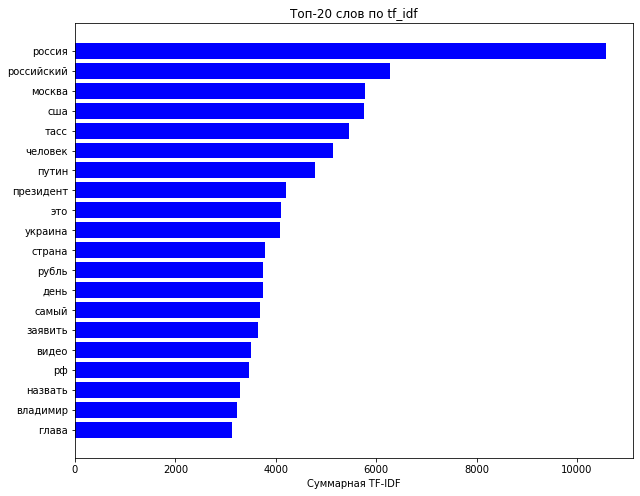

In [8]:

top_words = pd.DataFrame(
    {'words': tfidf_vec.get_feature_names(),
     'tf_idf': [sum(tfidf_df.iloc[:,i]) for i in range(tfidf_df.shape[1])]
    })
ttop = top_words.sort_values(by = ['tf_idf'], 
                             ascending=False).head(20).sort_values(by = ['tf_idf'], 
                                                                            ascending=True)

plt.figure(figsize=(10, 8))
plt.title('Топ-20 слов по tf_idf')
plt.barh(ttop['words'],
         ttop['tf_idf'], color='b', align='center')
plt.xlabel('Суммарная TF-IDF')
plt.show()


# LDA on a whole corpus 

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

In [13]:
model  = LatentDirichletAllocation(n_components = 60, learning_method= 'online')
model.fit(cv)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=60, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [15]:
import joblib
joblib.dump(model, 'allrusmodel.jl')

['allrusmodel.jl']

In [16]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}: ".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

n_top_words = 20

print("\nTopics в модели LDA: ")

# Получаем топики
tf_feature_names = tfidf_vec.get_feature_names()
print_top_words(model, tf_feature_names, n_top_words)


Topics в модели LDA: 

Topic #0: тысяча метр операция сочи тысяча рубль открытие рубль менее выход ранний аукцион корреспондент класс оценка оштрафовать профессиональный говориться повысить масштабный выставить

Topic #1: видео появиться британский найти оружие рассказывать смартфон язык лига завоевать египет кадр линия пообещать передать художник сезон канал автор иван

Topic #2: женщина учёный новость друг дтп километр построить выяснить соцсеть борьба рука школьник алексей навальный представитель карьер западный написать захаров отказ

Topic #3: столица праздник сентябрь ближний мэр иметь документ защита проведение обвинение войско нападение ряд неделя москва массовый следующий мероприятие направить собянин

Topic #4: архив интернет актёр первое место сообщение счёт этап запрет увидеть личный занять качество использование гонка процент незаконный товар услуга предупредить

Topic #5: четыре иностранный турист мужчина полный объект роспотребнадзор закрыть истребитель индия возможно с

In [17]:
import pyLDAvis
from pyLDAvis.sklearn import prepare as sklearn_prepare
pyLDAvis.enable_notebook()

sklearn_prepare(model, cv, tfidf_vec)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
52     0.200423 -0.034541       1        1  3.287833
22     0.189000 -0.053000       2        1  2.863732
26     0.167594  0.067551       3        1  2.774675
49     0.127044  0.145141       4        1  2.736443
55     0.214998  0.039549       5        1  2.659919
27    -0.061382  0.007605       6        1  2.176652
7      0.075209 -0.118625       7        1  2.166796
39     0.052543 -0.063296       8        1  2.142951
25     0.101256 -0.141888       9        1  2.136597
1     -0.007428 -0.048587      10        1  2.095121
40     0.116144 -0.089945      11        1  2.014742
37     0.087881 -0.120051      12        1  1.990849
31    -0.097476 -0.040207      13        1  1.987122
21     0.170694  0.037530      14        1  1.961398
30     0.020879  0.096753      15        1  1.903274
54     0.142283  0.108180      16        1  1.874361
15    -0.010835  0.022084      17        1  1.830811
2     -0.054131  0.014044      18        1  1.753356
3      0.075533 -0.012677      19        1  1.716187
58    -0.033793  0.017250      20        1  1.708035
12    -0.000417 -0.083370      21        1  1.707113
43    -0.015494  0.046169      22        1  1.694092
29    -0.097389 -0.011380      23        1  1.683952
48     0.070395  0.027075      24        1  1.661361
33    -0.034022  0.005550      25        1  1.639873
45     0.067706  0.187685      26        1  1.628877
18    -0.011308 -0.077887      27        1  1.587047
4      0.007815 -0.091478      28        1  1.579631
23    -0.026868 -0.122021      29        1  1.577617
8     -0.076998  0.138094      30        1  1.572596
14     0.006386  0.011234      31        1  1.556479
47    -0.050750 -0.045930      32        1  1.545517
59    -0.027079 -0.109833      33        1  1.524929
24    -0.044793 -0.074349      34        1  1.467591
13     0.002410  0.113628      35        1  1.438491
57    -0.041631  0.064047      36        1  1.428931
56    -0.030747 -0.110282      37        1  1.414112
11     0.007025  0.114834      38        1  1.409258
16    -0.023933  0.108342      39        1  1.406962
28    -0.042006 -0.002747      40        1  1.394421
35    -0.081317  0.046319      41        1  1.393744
19    -0.059088 -0.062200      42        1  1.382264
34    -0.089021  0.042105      43        1  1.372982
50    -0.008414 -0.019177      44        1  1.372879
46    -0.156441  0.070660      45        1  1.359531
17    -0.047487 -0.048792      46        1  1.356316
44     0.069201 -0.023417      47        1  1.322648
53    -0.100970 -0.079478      48        1  1.311602
42    -0.050286 -0.000195      49        1  1.311438
0     -0.120884 -0.090550      50        1  1.277318
9     -0.048468  0.112417      51        1  1.270554
10    -0.004279 -0.081358      52        1  1.265121
6     -0.097897  0.075967      53        1  1.261033
20    -0.055074  0.019426      54        1  1.256438
38    -0.014062 -0.063508      55        1  1.241253
36    -0.084411 -0.018375      56        1  1.192842
41    -0.038927  0.084763      57        1  1.181210
5     -0.015704  0.039804      58        1  1.152048
32    -0.037961  0.032853      59        1  1.087185
51    -0.073250  0.042488      60        1  0.931891, topic_info=           Term         Freq        Total Category  logprob  loglift
3030         рф  4128.000000  4128.000000  Default  30.0000  30.0000
344    владимир  3654.000000  3654.000000  Default  29.0000  29.0000
2776      путин  4701.000000  4701.000000  Default  28.0000  28.0000
3654    украина  4268.000000  4268.000000  Default  27.0000  27.0000
321       видео  4334.000000  4334.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1838  новое тип    80.077033    81.077316  Topic60  -5.1790   4.6633
3466  сулейманя    66.598066    67.598349  Topic60  -5.3634   4.6608
1285    команда  1206.528626  1543.259127  Topic60

# Estimating proportions and biases

In [9]:
import joblib 
model = joblib.load('allrusmodel.jl')

In [10]:
df['n_topic'] = np.argmax(model.transform(cv),axis =1)
df['topic_proba'] = np.max(model.transform(cv),axis =1)

In [11]:
df = df[df['date'].dt.year >= 2014]

In [13]:
df['wider_topic'] = ''

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
rubl = [0,7,53,25,19,21,37,46]
foreign  = [1,5,9,13,17,18,31,33,36,41,42,43,45,51]
Ukraine_USA = [28,30,49]
pravitelstvo = [11,26,48,50,54,55]
moscov = [59,56,40,3]
naval = [2]
kosmos = [6,8,29,]
korona =[12,47]
sila = [44,57,32,27,15]
domestic = [38,24,23,14]

In [19]:
df['wider_topic'][df['n_topic'].isin(rubl)] = 'Нефть&Рубль&Экономика'
df['wider_topic'][df['n_topic'].isin(foreign)] = 'Внешняя политика'
df['wider_topic'][df['n_topic'].isin(Ukraine_USA)] = 'Украина&США'
df['wider_topic'][df['n_topic'].isin(pravitelstvo)] = 'Правительство&Госдума'
df['wider_topic'][df['n_topic'].isin(moscov)] = 'Столица'
df['wider_topic'][df['n_topic'].isin(naval)] = 'Навальный'
df['wider_topic'][df['n_topic'].isin(kosmos)] = 'Космос'
df['wider_topic'][df['n_topic'].isin(korona)] = 'Коронавирус'
df['wider_topic'][df['n_topic'].isin(sila)] = 'Силовой блок'
df['wider_topic'][df['n_topic'].isin(domestic)] = 'Внутр.повестка'

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afte

In [22]:
df['wider_topic'][df['wider_topic'] == ''] = 'other'

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


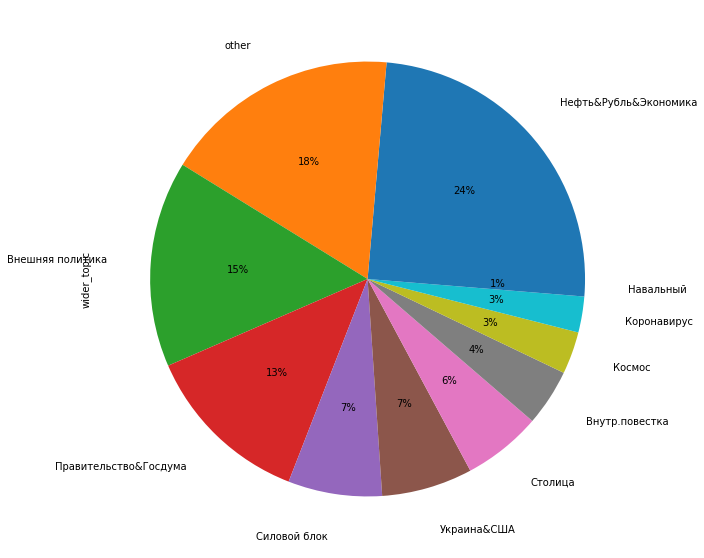

In [30]:
plt.figure(figsize = (10,10))
df['wider_topic'].value_counts().plot.pie(autopct='%1.0f%%', labeldistance=1.2)

plt.savefig('ruspie.png')

In [63]:
df['wider_topic'].unique()

array(['Навальный', 'Внешняя политика', 'Нефть&Рубль&Экономика',
       'Украина&США', 'Коронавирус', 'other', 'Столица', 'Силовой блок',
       'Правительство&Госдума', 'Внутр.повестка', 'Космос'], dtype=object)

In [75]:
df['source'][df['n_topic'] == 30 ].value_counts()

RG           3507
TASS         2836
RBK          1524
VEDOMOSTI    1420
Name: source, dtype: int64

In [73]:
sample['source'][sample['wider_topic'] == 'Силовой блок'].value_counts()

TASS         1862
RBK          1175
VEDOMOSTI     852
RG            773
Name: source, dtype: int64

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Топик # 0


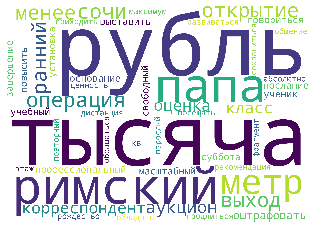

Топик # 1


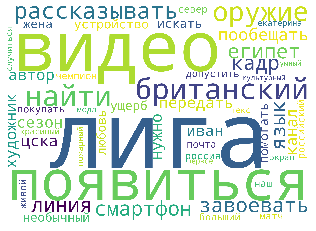

Топик # 2


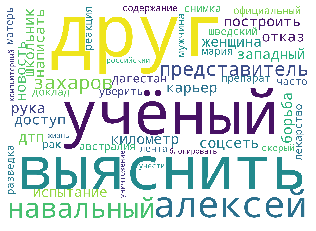

Топик # 3


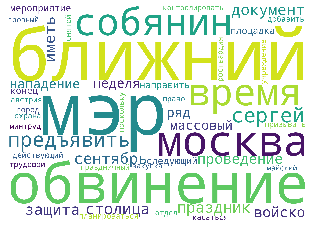

Топик # 4


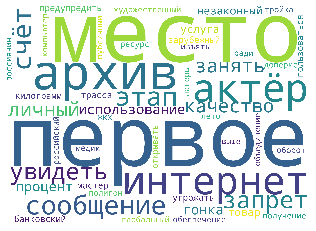

Топик # 5


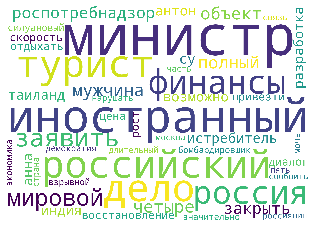

Топик # 6


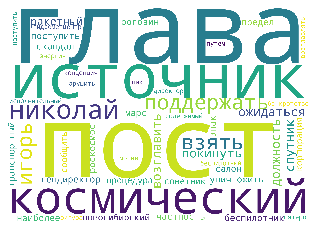

Топик # 7


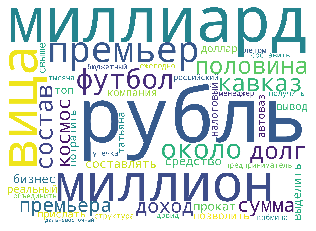

Топик # 8


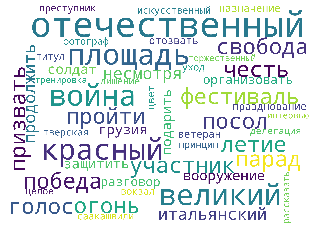

Топик # 9


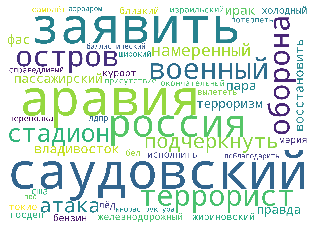

Топик # 10


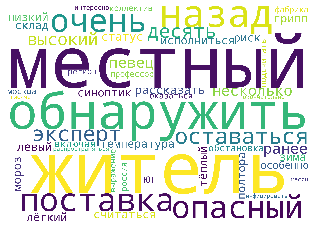

Топик # 11


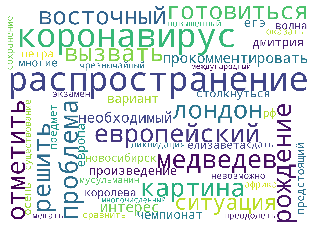

Топик # 12


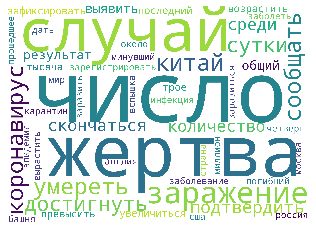

Топик # 13


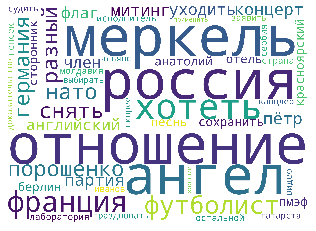

Топик # 14


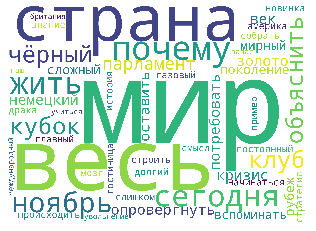

Топик # 15


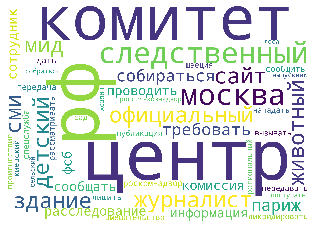

Топик # 16


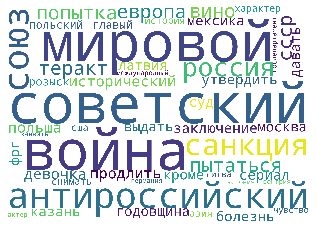

Топик # 17


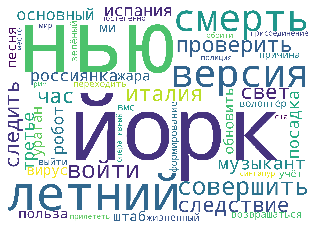

Топик # 18


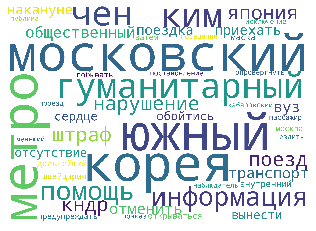

Топик # 19


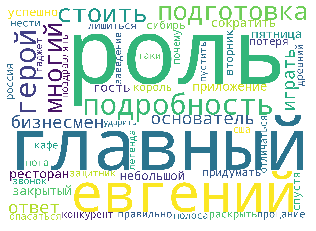

Топик # 20


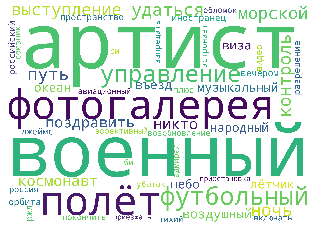

Топик # 21


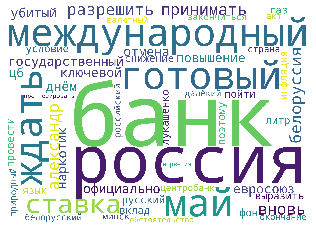

Топик # 22


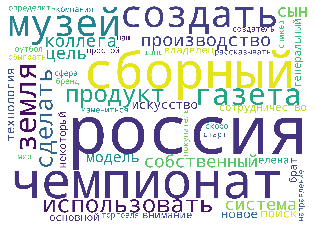

Топик # 23


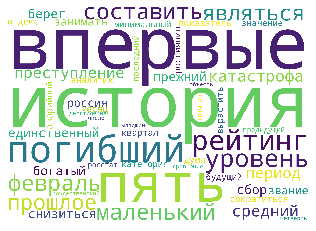

Топик # 24


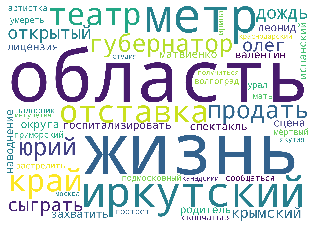

Топик # 25


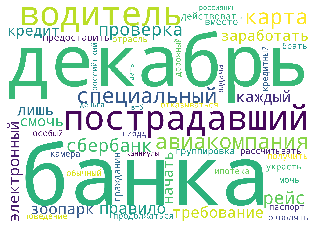

Топик # 26


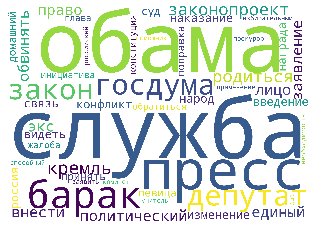

Топик # 27


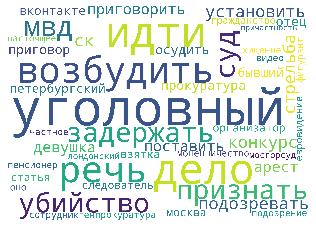

Топик # 28


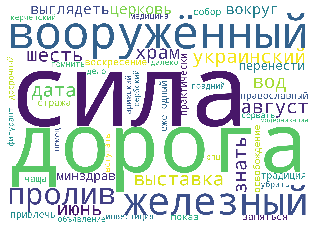

Топик # 29


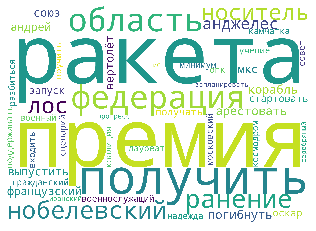

Топик # 30


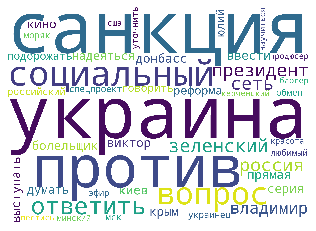

Топик # 31


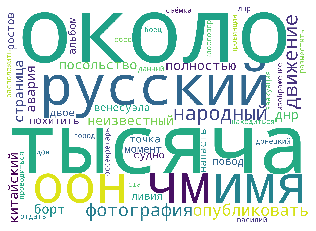

Топик # 32


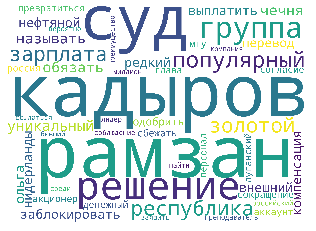

Топик # 33


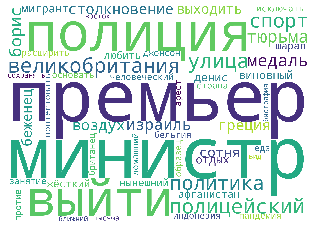

Топик # 34


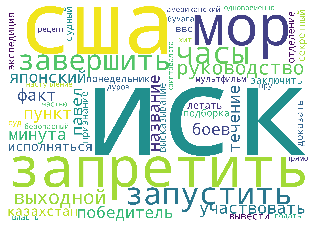

Топик # 35


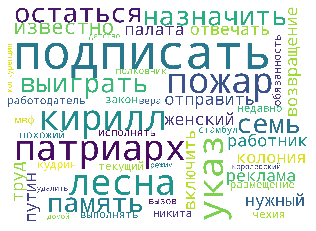

Топик # 36


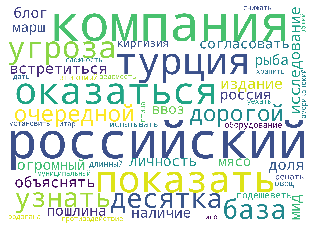

Топик # 37


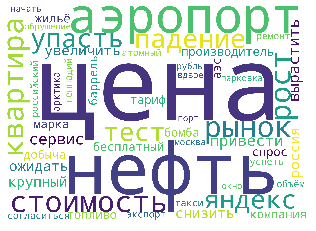

Топик # 38


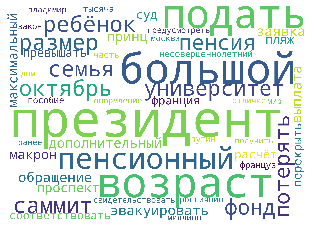

Топик # 39


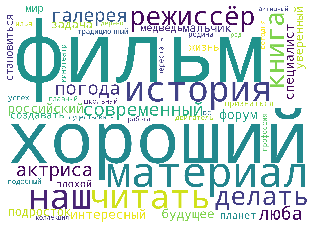

Топик # 40


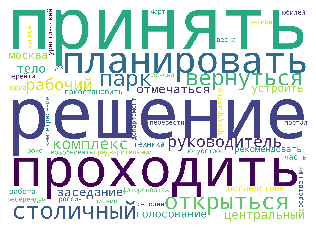

Топик # 41


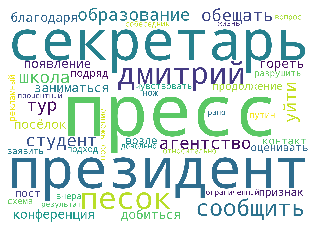

Топик # 42


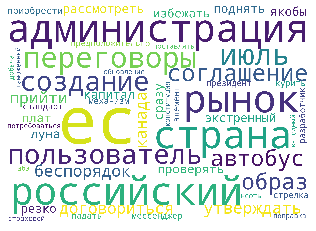

Топик # 43


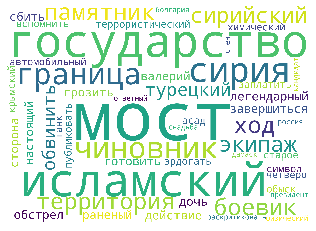

Топик # 44


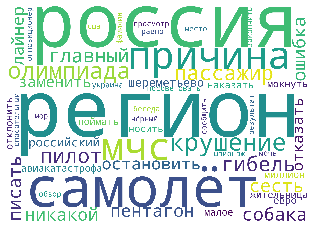

Топик # 45


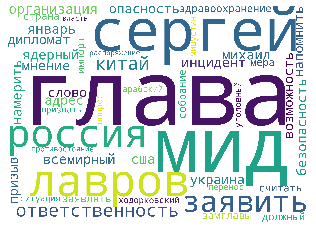

Топик # 46


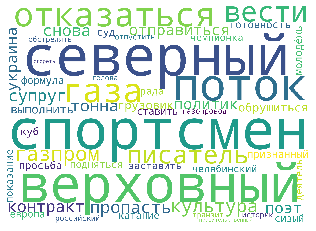

Топик # 47


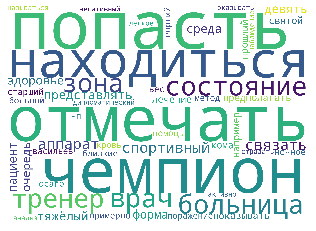

Топик # 48


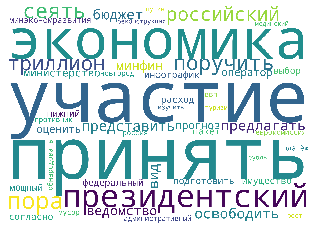

Топик # 49


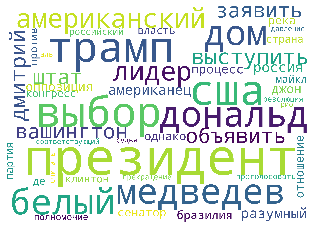

Топик # 50


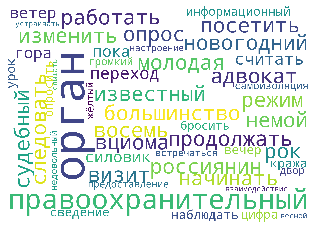

Топик # 51


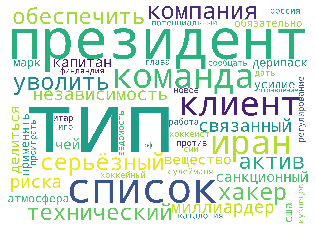

Топик # 52


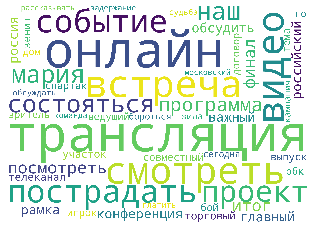

Топик # 53


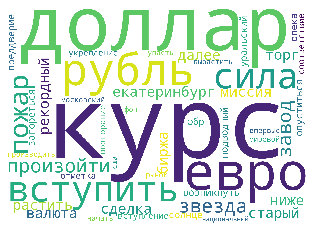

Топик # 54


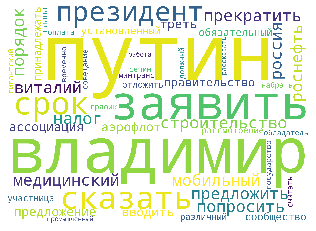

Топик # 55


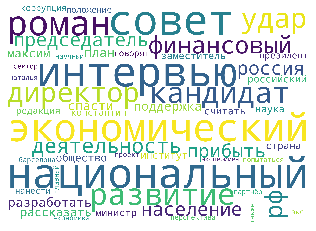

Топик # 56


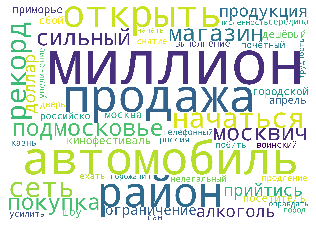

Топик # 57


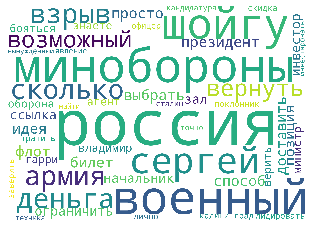

Топик # 58


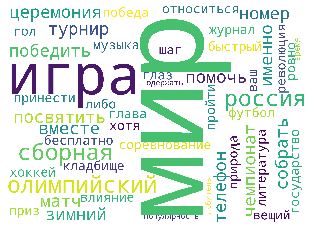

Топик # 59


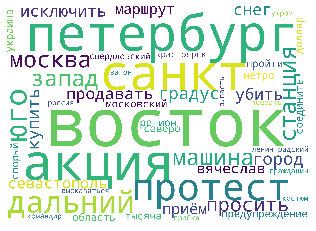

In [78]:

topics_v = []

for i in range(60):
    topics_v.append(model.components_[i])

topics_v_named = []
for j in range(60):
    topics_v_named.append([tfidf_vec.get_feature_names()[i] for i in topics_v[j].argsort()[:-50 - 1 :-1]])
    
for j in range(60):
    print('Топик #', j)
    cloud0 = WordCloud(background_color='white', width=2500, height=1800).generate(" ".join(topics_v_named[j]))
    
    plt.imshow(cloud0)
    plt.axis('off')
    plt.show()

# LDA on different samples


In [113]:
s1 = df[df['date'].dt.year == 2019]


In [114]:
vec1 = TfidfVectorizer(stop_words =russian_stopwords ,ngram_range=(1, 2),max_features =4000)
cv1 =vec1.fit_transform(s1['text_norm'])

In [96]:
from sklearn.decomposition import LatentDirichletAllocation

In [115]:
model1 = LatentDirichletAllocation(n_components = 50, learning_method = 'online')
model1.fit(cv1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=50, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [116]:
import pyLDAvis
from pyLDAvis.sklearn import prepare as sklearn_prepare
pyLDAvis.enable_notebook()

sklearn_prepare(model1, cv1, vec1)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
23    -0.231388  0.085179       1        1  7.444222
44    -0.159438 -0.107863       2        1  5.131597
8     -0.231855 -0.021800       3        1  5.075064
13    -0.217805  0.057908       4        1  4.580726
30    -0.151749  0.059749       5        1  3.552645
31    -0.141880 -0.186994       6        1  3.082048
32    -0.159204  0.114100       7        1  2.869533
1     -0.130124 -0.112911       8        1  2.672634
18    -0.065711  0.158312       9        1  2.609257
17    -0.125856  0.126855      10        1  2.563020
6     -0.059694 -0.003350      11        1  2.462604
28    -0.082283 -0.184133      12        1  2.402749
36     0.007633  0.214177      13        1  2.385768
2     -0.069247 -0.029324      14        1  2.073465
5      0.018824  0.152331      15        1  1.987686
29    -0.080699  0.056810      16        1  1.940794
11    -0.042062 -0.039463      17        1  1.900909
43    -0.032622 -0.072798      18        1  1.839485
48     0.023613 -0.002081      19        1  1.828921
38    -0.015689  0.001061      20        1  1.816340
33     0.057615  0.078779      21        1  1.772076
10     0.101989  0.120131      22        1  1.674870
27     0.005139 -0.004570      23        1  1.671886
25     0.092181  0.093677      24        1  1.634252
0      0.009248 -0.042560      25        1  1.634119
39     0.018895  0.079233      26        1  1.630877
4     -0.047198 -0.122379      27        1  1.624321
42     0.060012  0.002365      28        1  1.581415
47     0.058991 -0.001011      29        1  1.545711
41    -0.028886 -0.012900      30        1  1.532850
24     0.053688  0.088692      31        1  1.531402
20     0.032412 -0.078746      32        1  1.528559
3      0.060399 -0.062146      33        1  1.506922
16    -0.002878 -0.066123      34        1  1.467585
49     0.020067 -0.018239      35        1  1.452138
7      0.038908  0.071204      36        1  1.369826
46     0.059798 -0.015107      37        1  1.366748
12     0.056891 -0.090012      38        1  1.295900
19     0.098512 -0.004367      39        1  1.283692
22     0.088846  0.016450      40        1  1.263521
34     0.096093 -0.009461      41        1  1.243786
40     0.068988 -0.047885      42        1  1.203284
45     0.143316  0.006593      43        1  1.177477
26     0.091667 -0.061370      44        1  1.170362
21     0.063787 -0.097792      45        1  1.017060
35     0.100812  0.007630      46        1  1.000217
9      0.127850 -0.014971      47        1  0.776255
37     0.148897 -0.027706      48        1  0.676012
15     0.139133 -0.027241      49        1  0.579353
14     0.132064 -0.025929      50        1  0.568062, topic_info=               Term         Freq      Total Category  logprob  loglift
321           видео  1149.000000  1149.0000  Default  30.0000  30.0000
341        владимир   745.000000   745.0000  Default  29.0000  29.0000
3030             рф   679.000000   679.0000  Default  28.0000  28.0000
705            дело   721.000000   721.0000  Default  27.0000  27.0000
2786          путин   890.000000   890.0000  Default  26.0000  26.0000
...             ...          ...        ...      ...      ...      ...
1125     инфографик     0.072612     1.1853  Topic50 -10.1365   2.3781
1781   наш материал     0.072612     1.1853  Topic50 -10.1365   2.3781
1592  минобороны рф     0.072612     1.1853  Topic50 -10.1365   2.3781
322     видео видео     0.072612     1.1853  Topic50 -10.1365   2.3781
1776      наш видео     0.072612     1.1853  Topic50 -10.1365   2.3781

[2213 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3        19  0.975278     абызов
4        12  0.967758        абэ
5        16  0.985416  аварийный
7         9  0.986964     авария
8         4  0.198026     август
...     ...       ...        ...
3994      7  0.026175     япония
3995      2  0

In [117]:
 vez = sklearn_prepare(model1, cv1, vec1)

In [118]:
pyLDAvis.show(vez)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [10/Jun/2020 07:23:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 07:23:28] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 07:23:28] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 07:23:28] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...
